In [634]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from sklearn.learning_curve import learning_curve

/Users/hid/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [358]:
def feature_sex(s):
    if(s =='male'):
        return 0
    else:
        return 1

In [417]:
def feature_embarked(s):
    if(s == 'S'):
        return pd.Series([1,0,0])
    elif(s =='C'):
        return pd.Series([0,1,0])
    elif(s =='Q'):
        return pd.Series([0,0,1])
    else:
        return pd.Series([1,0,0])

In [418]:
def convert_df(titanic_df):
    titanic_df[['S','C','Q']] = titanic_df['Embarked'].apply(feature_embarked)
    titanic_df.drop(['Name','Ticket','Cabin','Embarked','S'],axis=1,inplace=True)
    titanic_df['Age'].fillna(titanic_df['Age'].median(axis=0),inplace=True)
    titanic_df['Sex'] = titanic_df['Sex'].apply(feature_sex)
    return titanic_df

In [419]:
titanic_df = pd.read_csv('train.csv')

In [406]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [414]:
 type(titanic_df[["Embarked", "Survived"]].groupby(['Embarked']).mean())

pandas.core.frame.DataFrame

In [415]:
 type(titanic_df["Survived"].groupby(titanic_df['Embarked']).mean())

pandas.core.series.Series

In [416]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


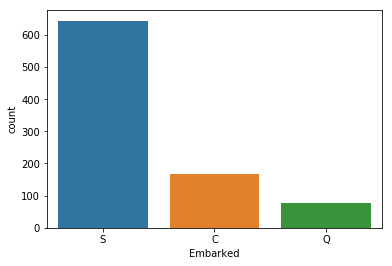

In [665]:
#model = LogisticRegression(C=100)
#model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05,max_depth=1)
titanic_df = pd.read_csv('train.csv')
sns.countplot('Embarked', data=titanic_df)
titanic_df.info()
pipeline = Pipeline([
        ('standard_scaler', StandardScaler()),
        ('gbdt',GradientBoostingClassifier())])
#params = {
#    'lg__C' : (1, 10,100),
#}
params={"gbdt__n_estimators": [10,100,200,500],"gbdt__max_depth": [1,3,10,100],"gbdt__learning_rate":[0.05,0.1]}
clf = GridSearchCV(pipeline, params,cv=10,scoring='roc_auc')
#clf = GridSearchCV(pipeline, params,cv=10)
titanic_df = convert_df(titanic_df)
x_train = shuffle(x_train)
x_train = titanic_df.values[:,2:]
y_train = titanic_df.values[:,1:2]
x_test = titanic_df.values[500:,2:]
y_test = titanic_df.values[500:,1:2]
c, r = y_train.shape
y_train = y_train.reshape(c,)

In [666]:
clf.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standard_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gbdt', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impuri...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gbdt__n_estimators': [10, 100, 200, 500], 'gbdt__max_depth': [1, 3, 10, 100], 'gbdt__learning_rate': [0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [509]:
clf.grid_scores_

[mean: 0.78518, std: 0.04583, params: {'gbdt__learning_rate': 0.05, 'gbdt__max_depth': 1, 'gbdt__n_estimators': 10},
 mean: 0.83214, std: 0.04145, params: {'gbdt__learning_rate': 0.05, 'gbdt__max_depth': 1, 'gbdt__n_estimators': 100},
 mean: 0.83352, std: 0.04363, params: {'gbdt__learning_rate': 0.05, 'gbdt__max_depth': 1, 'gbdt__n_estimators': 200},
 mean: 0.82849, std: 0.04206, params: {'gbdt__learning_rate': 0.05, 'gbdt__max_depth': 1, 'gbdt__n_estimators': 500},
 mean: 0.84310, std: 0.05264, params: {'gbdt__learning_rate': 0.05, 'gbdt__max_depth': 3, 'gbdt__n_estimators': 10},
 mean: 0.83282, std: 0.04535, params: {'gbdt__learning_rate': 0.05, 'gbdt__max_depth': 3, 'gbdt__n_estimators': 100},
 mean: 0.83186, std: 0.05045, params: {'gbdt__learning_rate': 0.05, 'gbdt__max_depth': 3, 'gbdt__n_estimators': 200},
 mean: 0.84556, std: 0.05762, params: {'gbdt__learning_rate': 0.05, 'gbdt__max_depth': 3, 'gbdt__n_estimators': 500},
 mean: 0.77218, std: 0.06187, params: {'gbdt__learning_rat

In [512]:
print('Test set score: {}'.format(clf.score(x_test, y_test)))
print('Best parameters: {}'.format(clf.best_params_))
print('Best cross-validation: {}'.format(clf.best_score_))

Test set score: 0.8141189195185534
Best parameters: {'gbdt__learning_rate': 0.1, 'gbdt__max_depth': 10, 'gbdt__n_estimators': 500}
Best cross-validation: 0.8466153933220146


In [692]:
pred=clf.predict(x_test)
predict_pro = clf.predict_proba(x_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

        0.0       0.89      0.97      0.93       242
        1.0       0.94      0.81      0.87       149

avg / total       0.91      0.91      0.91       391

[[235   7]
 [ 29 120]]


In [584]:
precision,recall, thresholds = precision_recall_curve(y_test[:,0], predict_pro[:,1])
area = auc(recall, precision)

In [689]:
train_sizes, train_scores, test_scores = learning_curve(clf.best_estimator_, X=x_train, y=y_train,train_sizes=np.arange(0.1, 1.1, 0.1), cv=3,scoring="neg_log_loss") 

In [679]:
train_scores

array([[ 1.,  1.,  1.]])

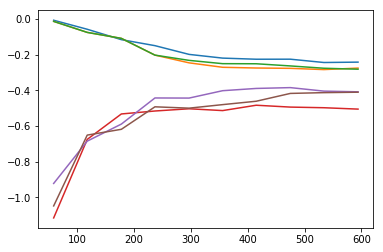

In [690]:
plt.plot(train_sizes,train_scores)
plt.plot(train_sizes,test_scores)

In [585]:
area

0.77772568480152704

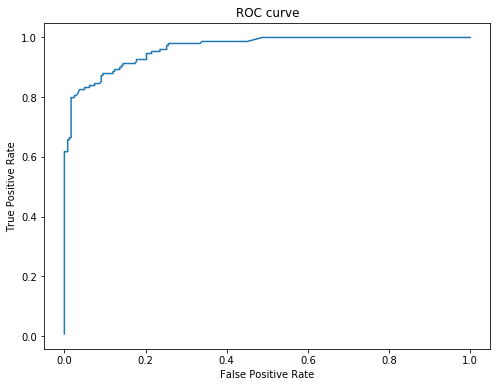

In [693]:
fpr, tpr, thresholds= roc_curve(y_test[:,0],predict_pro[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [696]:
predict_mine = np.where(predict_pro[:,1] > 0.8, 1, 0)
print(classification_report(y_test, predict_mine))
print(confusion_matrix(y_test,predict_mine))

             precision    recall  f1-score   support

        0.0       0.81      1.00      0.89       242
        1.0       1.00      0.61      0.76       149

avg / total       0.88      0.85      0.84       391

[[242   0]
 [ 58  91]]


In [465]:
#model = GradientBoostingClassifier(n_estimators=100,max_depth=1,)
pipeline = Pipeline([
        ('standard_scaler', StandardScaler()),
        ('gbdt',GradientBoostingClassifier(max_depth=3,n_estimators=200))])
#params = {
#    'lg__C' : (1, 10,100),
#}
model = pipeline
x_train = titanic_df.values[:,2:]
y_train = titanic_df.values[:,1:2]
c, r = y_train.shape
y_train = y_train.reshape(c,)
model.fit(x_train,y_train)
test_df = pd.read_csv('test.csv')
test_df = convert_df(test_df)
test_df['Fare'].fillna(0,inplace=True)
test_x = test_df.values[:,1:]
#test_y = test_df.values[:,0:1]
class_predict = model.predict(test_x)

In [632]:
predict_pro = clf.predict_proba(test_x)
predict_mine = np.where(predict_pro[:,1] > 0.8, 1, 0)
zip_data = zip(test_df.values[:,0].astype(int),predict_mine.astype(int))
res = list(zip_data)
res_df = pd.DataFrame(res)
res_df.columns = ["PassengerId","Survived"]
res_df.to_csv("predict_result_data3.csv",index=False)

In [694]:
test_df = pd.read_csv('test.csv')
test_df = convert_df(test_df)
test_df['Fare'].fillna(0,inplace=True)
test_x = test_df.values[:,1:]
#test_y = test_df.values[:,0:1]
class_predict =clf.predict(test_x)

In [695]:
zip_data = zip(test_df.values[:,0].astype(int),class_predict.astype(int))
res = list(zip_data)
res_df = pd.DataFrame(res)
res_df.columns = ["PassengerId","Survived"]
res_df.to_csv("predict_result_data.csv",index=False)